# Implementation of a Digital Keyboard Based on Sinusoidal Signals

[**Python Notebook**](https://github.com/dafmontenegro/sine-wave-based-digital-keyboard/blob/master/sine-wave-based-digital-keyboard.ipynb) | [**Webpage**](https://montenegrodanielfelipe.com/blog/sine-wave-based-digital-keyboard) | [**Repository**](https://github.com/dafmontenegro/sine-wave-based-digital-keyboard)

## Introduction

In this workshop, students will explore the generation of sinusoidal signals $ x(t) = A \sin(wt) $ and their relationship with sound production at different frequencies. Based on this knowledge, they will design and implement a digital piano capable of generating musical notes using programming.

**Professor:**
- **Oswaldo Rojas Camacho**

**Students:**
- **Daniel Felipe Montenegro**
- **Santiago Barrera**

**Course:**
- **Theory of Information and Communication Systems** - **Universidad Nacional de Colombia**

Sinusoidal signals $ x(t) = A \sin(wt) $ can generate sounds at a given frequency, where $ w = 2\pi f $. Based on this concept, design and implement a piano with musical notes. Describe the theoretical framework, design, and implement the piano.

## Objectives  

### General Objective:  
Design and implement a digital piano using the synthesis of sinusoidal signals.  

### Specific Objectives:  
1. Understand the concept of sinusoidal signals and their relationship with audible frequencies.  
2. Analyze the frequency spectrum of musical notes in the Western tempered system.  
3. Implement an algorithm that generates sounds from sinusoidal signals with different frequencies.  
4. Build a graphical or console-based interface for interacting with the digital piano. 

## Theoretical Framework

### Sinusoidal Signals and Sound  
- Definition of a sinusoidal signal: $ x(t) = A \sin(wt + \phi) $  
- Relationship between frequency $ f $ and the perceived pitch.  
- Fundamental frequency of a signal and its harmonic spectrum.  

### Musical Notes and Their Frequencies  

Frequency table of musical notes:  

| Note | Frequency (Hz) |
|------|--------------|
| C4 (Do) | 261.63 |
| D4 (Re) | 293.66 |
| E4 (Mi) | 329.63 |
| F4 (Fa) | 349.23 |
| G4 (Sol) | 392.00 |
| A4 (La) | 440.00 |
| B4 (Si) | 493.88 |
| C5 (Do) | 523.25 |

## Sound Generation on a Computer  

- Use of the sinusoidal function for audio synthesis.  
- Implementation in MATLAB or Python (libraries such as NumPy, sounddevice, or PyGame). 

## User Interfaces for the Piano  

- Implementation in the console or with a graphical user interface (GUI).  
- Use of libraries such as Tkinter, PyGame, or PyQt to create digital keyboards.  

## Student Project Development

### Step 1: Generating Sinusoidal Signals

In this step, we will **write a program** that generates a **sinusoidal signal** using the formula:  
$x(t) = A \sin(2\pi f t)$  
and plays it as audio. We will also **experiment** with different values of **amplitude** ($A$) and **frequency** ($f$) to observe how the sound changes.

In [1]:
import numpy as np
from IPython.display import Audio

def generate_sinusoidal(frequency=440, duration=1.0, amplitude=0.5, sample_rate=44100):
    """
    Generates a sinusoidal signal and returns an Audio object for playback.
    
    Parameters:
    - frequency: The frequency of the tone in Hz.
    - duration: Duration of the tone in seconds.
    - amplitude: Amplitude of the signal.
    - sample_rate: Sampling rate in Hz.
    """
    # Generate time vector
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    # Generate the sinusoidal waveform
    waveform = amplitude * np.sin(2 * np.pi * frequency * t)
    # Return an Audio object for playback
    return Audio(waveform, rate=sample_rate, autoplay=True)

# Test: Generate and play a 440 Hz tone (A4) with default amplitude
generate_sinusoidal(440, duration=1.0, amplitude=0.5)

#### Additional Experimentation Cell:
Experiment with different amplitudes and frequencies:

In [2]:
# Example 1: Lower amplitude, higher frequency
generate_sinusoidal(frequency=880, duration=1.0, amplitude=0.3)

In [3]:
# Example 2: Higher amplitude, lower frequency
generate_sinusoidal(frequency=220, duration=1.0, amplitude=0.8)

### Step 2: Implementation of Musical Notes

Next, we will **implement a function** that plays a musical note based on its **name**. First, we define a **dictionary** of musical notes and their corresponding **frequencies** (in Hz) according to the **Western tempered scale**. Then, we create a function that, given a note's name, generates and plays the appropriate **sinusoidal signal**.

In [4]:
# Define a dictionary mapping note names to their frequencies
notes = {
    "C4": 261.63, "C#4": 277.18, "D4": 293.66, "D#4": 311.13,
    "E4": 329.63, "F4": 349.23, "F#4": 369.99, "G4": 392.00,
    "G#4": 415.30, "A4": 440.00, "A#4": 466.16, "B4": 493.88,
    "C5": 523.25
}

def play_note(note, duration=1.0, amplitude=0.5):
    """
    Plays a musical note by generating its corresponding sinusoidal wave.
    
    Parameters:
    - note: The name of the note (e.g., "C4", "A4").
    - duration: Duration of the note in seconds.
    - amplitude: Amplitude of the signal.
    """
    if note in notes:
        frequency = notes[note]
        print(f"Playing {note} ({frequency} Hz)")
        return generate_sinusoidal(frequency, duration, amplitude)
    else:
        print("Error: Invalid note name")

# Test: Play the note "C4"
play_note("C4")

Playing C4 (261.63 Hz)


### Step 3: Building the Digital Piano

In this step, we design an **interactive digital piano**. Users will be able to **click on buttons** representing different musical notes, and each button click will play the corresponding note. We will use the **ipywidgets** library to create a **graphical interface (GUI)** in the notebook.

In [5]:
import ipywidgets as widgets
from IPython.display import display

# Create an output widget for displaying audio and messages
out = widgets.Output()

def on_piano_key_click(b):
    """
    Callback function for when a piano key is clicked.
    """
    with out:
        out.clear_output(wait=True)
        note = b.description
        display(play_note(note))

# Create a button for each note in the dictionary
piano_keys = [widgets.Button(description=note, layout=widgets.Layout(width="50px")) for note in notes]

# Assign the click event to each button
for key in piano_keys:
    key.on_click(on_piano_key_click)

# Arrange the buttons horizontally to form a simple piano layout
piano = widgets.HBox(piano_keys)
display(piano, out)

Output()

### Step 4: Testing and Adjustments

Now that our digital piano is built, we need to **verify** that the generated frequencies are accurate. In this step, we use **spectral analysis** via the **Fast Fourier Transform (FFT)** to examine the **frequency spectrum** of our generated sinusoidal signals.

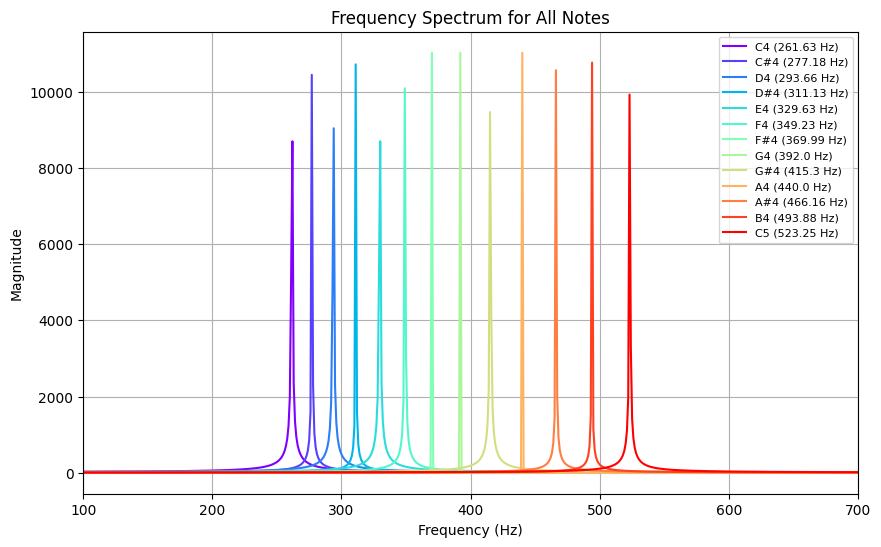

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Create a colormap to assign a distinct color to each note
colors = cm.rainbow(np.linspace(0, 1, len(notes)))

sample_rate = 44100
duration = 1.0
amplitude = 0.5

plt.figure(figsize=(10, 6))

# Loop over each note, compute its FFT, and plot the frequency spectrum
for i, (note, freq) in enumerate(notes.items()):
    # Generate time vector and sinusoidal waveform
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    waveform = amplitude * np.sin(2 * np.pi * freq * t)
    
    # Compute FFT and the corresponding frequency axis
    fft_spectrum = np.fft.fft(waveform)
    freq_axis = np.fft.fftfreq(len(fft_spectrum), 1/sample_rate)
    
    # Plot only the positive frequencies
    pos_mask = freq_axis >= 0
    plt.plot(freq_axis[pos_mask],
             np.abs(fft_spectrum)[pos_mask],
             label=f"{note} ({freq} Hz)",
             color=colors[i])

plt.title("Frequency Spectrum for All Notes")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(100, 700)
plt.grid(True)
plt.legend(loc="upper right", fontsize=8)
plt.show()


#### Explanation

- **Color Mapping:**  
  We use **`matplotlib.cm.rainbow`** to generate a **distinct color** for each note.

- **Signal Generation & FFT:**  
  For each note, a **sinusoidal signal** is generated using the formula:  
  $$x(t) = A \sin(2\pi f t)$$  
  The **FFT** of the signal is computed, and only the **positive frequency components** are plotted.

- **X-Axis Limits:**  
  The **x-axis is set from 100 Hz to 700 Hz** to clearly display the **frequency peaks** of all notes.

- **Combined Plot:**  
  **All notes** are plotted on the **same graph** with **distinct colors** and a **legend** for easy identification.

### Step 5: Resources and Tools

For this project, the following resources and tools were used:
- **Programming Language:** Python
- **Libraries:** NumPy, IPython.display (Audio) and ipywidgets
- **Documentation:** Signal theory and digital audio synthesis documentation provided the theoretical foundation.

## Conclusions

In this project, we have successfully developed a **digital piano** using the synthesis of **sinusoidal signals**. Through this exercise, we learned how to generate and manipulate **audio signals** using **Python**, implement functions to play **musical notes** based on their standard **frequencies**, and build an interactive graphical interface with **ipywidgets**. Our testing using **FFT** confirmed the accuracy of the generated frequencies.

This project not only demonstrates the practical application of **signal theory** and **digital audio synthesis** but also opens the door to further enhancements, such as adding **recording capabilities**, **multi-octave support**, and improved **graphical design**. The experience gained from this development process is a valuable addition to our **portfolio** and serves as a foundation for more **advanced projects in digital audio processing**.

**Key Takeaways:**
- Mastery of **sinusoidal signal generation** and its application in **audio synthesis**.
- Practical experience in programming an **interactive digital instrument**.
- Understanding of **frequency analysis using FFT** for verifying signal accuracy.
- Proficiency in creating **user interfaces** with **Python libraries**.

We encourage further exploration and enhancement of this project to expand its **functionality** and **design**.
